In [1]:
import pandas
import numpy as np

from clean import *

df_players_teams = pandas.read_csv("dataset/players_teams.csv")

df_players_teams = clean_teams_players(df_players_teams)

df_players_teams.head()

df_players= pandas.read_csv("dataset/players.csv")

df_players = clean_players(df_players)

df_merged = merge_player_info(df_players, df_players_teams) 




      coachID  year tmID  lgID  stint  won  lost  post_wins  post_losses
0  adamsmi01w     5  WAS  WNBA      0   17    17          1            2
1  adubari99w     1  NYL  WNBA      0   20    12          4            3
2  adubari99w     2  NYL  WNBA      0   21    11          3            3
3  adubari99w     3  NYL  WNBA      0   18    14          4            4
4  adubari99w     4  NYL  WNBA      0   16    18          0            0


      coachID  year tmID  stint  won  lost  post_wins  post_losses
0  adamsmi01w     5  WAS      0   17    17          1            2
1  adubari99w     1  NYL      0   20    12          4            3
2  adubari99w     2  NYL      0   21    11          3            3
3  adubari99w     3  NYL      0   18    14          4            4
4  adubari99w     4  NYL      0   16    18          0            0


In [2]:
df_pred = player_rankings(df_merged) # TODO: to remove year 10 add parameter 9

#sort by player rankings
df_pred = df_pred.sort_values(by=['predictions'], ascending=False)

df_pred.head(10)

,playerID,medium,predictions
349,parkeca01w,3.585158,3.562871
263,leslili01w,3.445683,3.444324
445,tauradi01w,3.163171,3.164315
83,catchta01w,2.997236,3.010057
219,jacksla01w,2.744475,2.752808
360,pondeca01w,2.379362,2.389470
415,smithka01w,2.323383,2.314044
524,youngso01w,2.248909,2.284971
177,griffyo01w,2.254833,2.265198
35,beardal01w,2.210860,2.224528


,year,playerID,medium,predictions
0,1,leslili01w,0.013213,0.013224
1,2,leslili01w,1.135124,1.135086
2,3,leslili01w,0.432967,0.432952
3,4,leslili01w,-0.196197,-0.196188
4,5,leslili01w,0.067255,0.067256


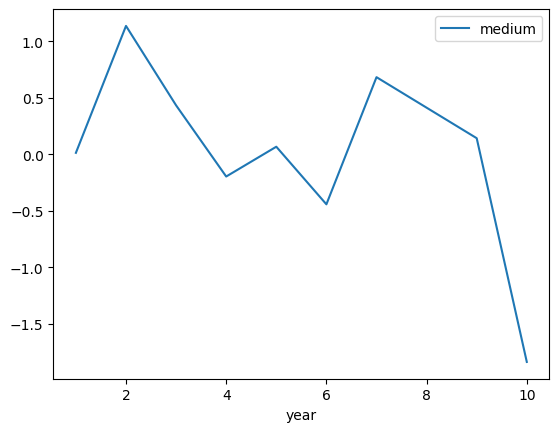

In [3]:
#
#
# NOTE: PREDICTION IS NOT WORKING properly for now, so we use medium ranking
#
#

df_player_evol = player_ranking_evolution(df_merged, 'leslili01w')

# plot of the evolution
df_player_evol.plot(x='year', y='medium', kind='line')
df_player_evol.head()


,year,playerID,medium,predictions
0,5,tauradi01w,-0.685528,-0.685510
1,6,tauradi01w,-0.888309,-0.888285
2,7,tauradi01w,-0.139748,-0.139744
3,8,tauradi01w,0.523516,0.523502
4,9,tauradi01w,0.193683,0.193677


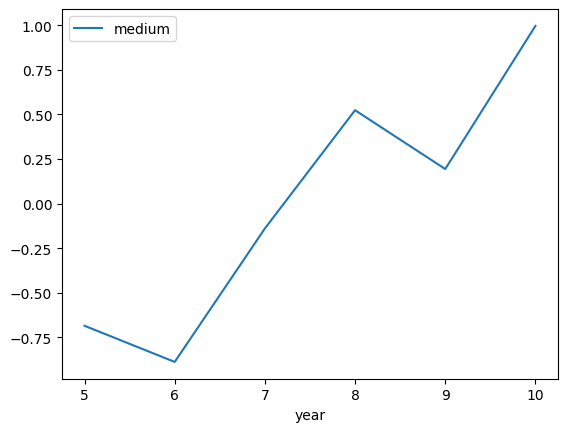

In [4]:
df_player_evol = player_ranking_evolution(df_merged, 'tauradi01w')

# plot of the evolution
df_player_evol.plot(x='year', y='medium', kind='line')
df_player_evol.head()

In [5]:
# get the players in a team 

df_player_of_teams = merge_player_info(df_players, df_players_teams) 

df_players_teams = player_in_team_by_year(df_player_of_teams)

df_players_teams = team_mean(df_players_teams, df_pred)

df_players_teams.head(20)


,tmID,year,playerID,mean
0,ATL,9,"[balesal01w, castriz01w, desouer01w, haynikr01...",0.357384
1,ATL,10,"[castriz01w, desouer01w, holdsch01w, lacyje01w...",0.780557
2,CHA,1,"[bauerca01w, brazian01w, enissh01w, erbsu01w, ...",0.088174
3,CHA,2,"[anderke01w, bristre01w, edwarto01w, enissh01w...",0.469957
4,CHA,3,"[anderke01w, edwarto01w, enissh01w, erbsu01w, ...",0.477709
5,CHA,4,"[brownru01w, brumfma01w, enissh01w, feastal01w...",0.561874
6,CHA,5,"[andrame01w, bjorkte01w, feastal01w, frettla01...",0.668312
7,CHA,6,"[darlihe01w, feastal01w, goodsad01w, lewisty01...",0.896144
8,CHA,7,"[bondla01w, currimo01w, darlihe01w, feastal01w...",0.619900
9,CHI,7,"[brownco01w, cronika01w, dalesst01w, dupreca01...",0.476488


Best teams in the 10 year history of the sport ...

In [6]:
df_players_teams = df_players_teams.sort_values(by=['mean'], ascending=False)
df_players_teams.head(10)

,tmID,year,playerID,mean
62,LAS,10,"[bobbish01w, ferdima01w, harrokr01w, haydeva01...",1.496491
33,DET,10,"[bakersh01w, braxtka01w, davista02w, deforan01...",1.341929
32,DET,9,"[braxtka01w, fordch01w, givench01w, hornbal01w...",1.255590
61,LAS,9,"[bobbish01w, brownki01w, dydekma01w, ferdima01...",1.187297
29,DET,6,"[braxtka01w, cashsw01w, farriba01w, fordch01w,...",1.110789
31,DET,8,"[braxtka01w, cashsw01w, fordch01w, johnssh01w,...",0.994120
118,SAS,10,"[darlihe01w, frazeme01w, hammobe01w, johnsvi01...",0.960479
56,LAS,4,"[byearla01w, dixonta01w, gilloje01w, johnsch01...",0.955209
75,MIN,10,"[anosini01w, augusse01w, hodgero01w, holliqu01...",0.947552
30,DET,7,"[batteja01w, braxtka01w, cashsw01w, fordch01w,...",0.935499


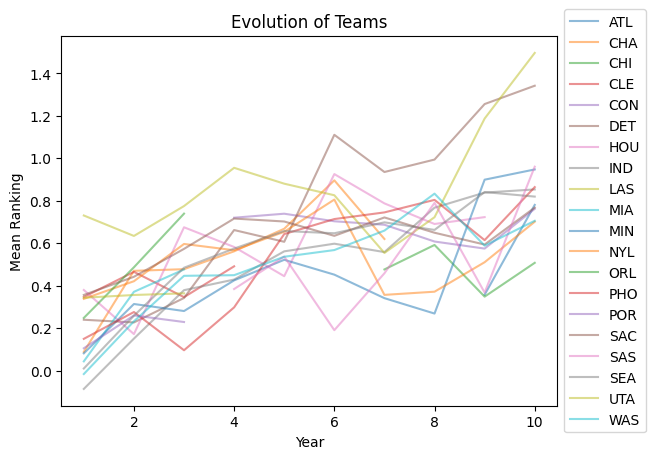

tmID,ATL,CHA,CHI,CLE,CON,DET,HOU,IND,LAS,MIA,MIN,NYL,ORL,PHO,POR,SAC,SAS,SEA,UTA,WAS
year,,,,,,,,,,,,,,,,,,,,
1,NaN,0.088174,NaN,0.346757,NaN,0.239514,0.379677,-0.086362,0.730659,0.043450,0.081314,0.337939,0.248123,0.149536,0.105097,0.356350,NaN,0.009838,0.343245,-0.016246
2,NaN,0.469957,NaN,0.465146,NaN,0.226853,0.171868,0.150689,0.634274,0.371078,0.313701,0.421016,0.486627,0.275899,0.259838,0.441912,NaN,0.258426,0.356126,0.232132
3,NaN,0.477709,NaN,0.345950,NaN,0.342046,0.675089,0.378870,0.775129,0.476513,0.280610,0.596567,0.739404,0.095796,0.228812,0.573393,NaN,0.484554,0.363895,0.446439
4,NaN,0.561874,NaN,0.491260,0.720206,0.662076,0.582274,0.428844,0.955209,NaN,0.425066,0.566977,NaN,0.297820,NaN,0.716197,0.384245,0.574715,NaN,0.449436
5,NaN,0.668312,NaN,NaN,0.739050,0.606715,0.444737,0.561757,0.880480,NaN,0.521923,0.653886,NaN,0.643174,NaN,0.702356,0.537064,0.657434,NaN,0.536336
6,NaN,0.896144,NaN,NaN,0.703416,1.110789,0.925715,0.597808,0.825993,NaN,0.451977,0.805623,NaN,0.713839,NaN,0.634714,0.190361,0.646955,NaN,0.567791
7,NaN,0.619900,0.476488,NaN,0.687017,0.935499,0.787631,0.558235,0.554144,NaN,0.341173,0.356724,NaN,0.745207,NaN,0.721472,0.458479,0.698379,NaN,0.659467
8,NaN,NaN,0.591804,NaN,0.608006,0.994120,0.690620,0.767409,0.722588,NaN,0.268697,0.371643,NaN,0.804195,NaN,0.649402,0.789975,0.662710,NaN,0.833575
9,0.357384,NaN,0.348364,NaN,0.574731,1.255590,0.722985,0.838508,1.187297,NaN,0.899336,0.510500,NaN,0.614494,NaN,0.593709,0.367570,0.840930,NaN,0.588555


In [7]:
import matplotlib.pyplot as plt

# Group the data by tmID and year and count the number of unique playerIDs for each group
df_teams_evolution = df_players_teams.groupby(['tmID', 'year']).agg({
    'mean': 'mean'
}).reset_index()


# Pivot the data to have tmID as columns and year as index
df_teams_evolution = df_teams_evolution.pivot(index='year', columns='tmID', values='mean')
#
## Plot the data as a stacked area chart
df_teams_evolution.plot(kind='line', stacked=False, alpha=0.5)

# Set the title and axis labels
plt.title('Evolution of Teams')
plt.xlabel('Year')
plt.ylabel('Mean Ranking')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()

df_teams_evolution.head(10)

# NOTA: as primeiras epocas tem menos pontuação porque tem ...
# jogadores com rankings que n são tão precisos. Uma vez que jogaram menos jogos
# TODO: podemos calcular os rankings progressivamente para um grafico mais preciso

By using the 10th year team squad we can come up with a mean team rating. 

In [8]:
#get the teams rating for year 10 
# NOTE: I AM USING YEAR 10 ON THE PLAYER CALCULATION ... we have to take it out
year_10 = df_players_teams[df_players_teams['year'] == 10]

year_10 = year_10.sort_values(by=['mean'], ascending=False)

year_10.head(20)

,tmID,year,playerID,mean
62,LAS,10,"[bobbish01w, ferdima01w, harrokr01w, haydeva01...",1.496491
33,DET,10,"[bakersh01w, braxtka01w, davista02w, deforan01...",1.341929
118,SAS,10,"[darlihe01w, frazeme01w, hammobe01w, johnsvi01...",0.960479
75,MIN,10,"[anosini01w, augusse01w, hodgero01w, holliqu01...",0.947552
98,PHO,10,"[bonnede01w, johnste01w, mazzake01w, ohldeni01...",0.864353
52,IND,10,"[beviltu01w, catchta01w, davenje01w, dixonta01...",0.853407
128,SEA,10,"[atkinla01w, batkosu01w, birdsu01w, burseja01w...",0.819687
1,ATL,10,"[castriz01w, desouer01w, holdsch01w, lacyje01w...",0.780557
111,SAC,10,"[boddiwh01w, brunsre01w, harpela01w, haynikr01...",0.767755
23,CON,10,"[blackch01w, brownki01w, cironkr01w, ervinla01...",0.761879


Note, that the past year results can be misleading to the team strength calculation. Take as an example the ATL team that in year 9 (the first season in which they played in the league) they had a weak team, but in year 10 they had a stronger team.

In [9]:
year_10 = df_players_teams[df_players_teams['year'] == 10]

except_year_10 = df_players_teams[df_players_teams['year'] != 10]

except_year_10 = except_year_10.groupby(['tmID']).agg({
    'mean': 'mean',
    })

# EQUIPAS QUE MUDARAM DE ESTADO : UTA->SAS (epoca 4) e ORL/CON (epoca 4) TODO
# ... ver se n me esqueci de ng

except_year_10 = except_year_10.sort_values(by=['mean'], ascending=False)


except_year_10.head(50)

,mean
tmID,
LAS,0.807308
DET,0.708134
CON,0.672071
SAC,0.598834
HOU,0.597844
CHA,0.540296
SEA,0.537105
NYL,0.513431
ORL,0.491385
